In [1]:
import numpy as np
from scipy.stats import t
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


def ead_scaled_student_t(nu):
    """
    Computes the Expected Absolute Deviation (EAD) of a scaled Student's t-distribution
    with mean 0 and variance 1.
    
    Parameters:
    - nu: degrees of freedom of the t-distribution (must be > 2 for variance to exist)
    
    Returns:
    - EAD: Expected Absolute Deviation
    """
    if nu <= 2:
        raise ValueError("Degrees of freedom nu must be > 2 for variance to exist.")
    
    # Scaling factor to ensure variance = 1
    scale = np.sqrt(nu / (nu - 2))
    
    # Define the scaled PDF of the t-distribution
    pdf_scaled = lambda x: t.pdf(x / scale, df=nu) / scale
    
    # Compute the expected absolute deviation using numerical integration
    ead, _ = quad(lambda x: x * pdf_scaled(x), 0, np.inf)
    return 2 * ead  # Multiply by 2 because of symmetry


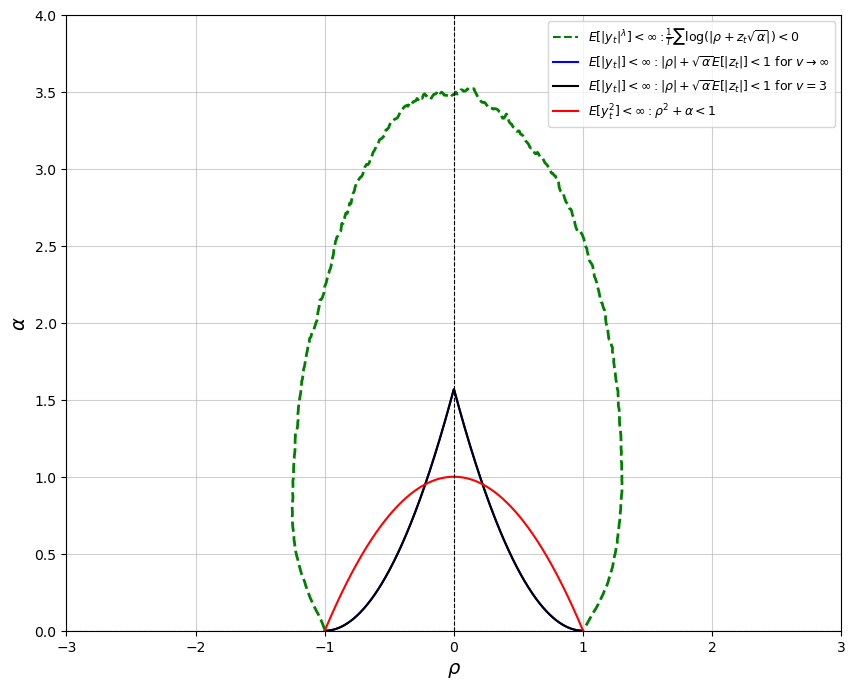

In [149]:
v = 10000
expected_abs_z = ead_scaled_student_t(v)


# Constants
pi = np.pi
T = 10000  # Number of samples
z_samples = np.random.normal(0, 1, T)  # Draw T samples from N(0, 1)

# Define ranges for rho and alpha
rho_vals = np.linspace(-2.5, 2.5, 500)
alpha_vals = np.linspace(0.01, 5, 500)  # Avoid alpha = 0 for stability

# Grid to evaluate the condition
Rho, Alpha = np.meshgrid(rho_vals, alpha_vals)

# Compute the average log for the condition
log_condition = np.zeros_like(Rho)
for i in range(Rho.shape[0]):  # For each alpha
    for j in range(Rho.shape[1]):  # For each rho
        rho = Rho[i, j]
        alpha = Alpha[i, j]
        log_terms = np.log(np.abs(rho + z_samples * np.sqrt(alpha)))
        log_condition[i, j] = np.mean(log_terms)

# Determine the boundary where the condition transitions from < 0 to >= 0
contour_levels = [0]  # We are interested in the zero-level line

# Plot the curves and contours
plt.figure(figsize=(10, 8))

# Contour: 1/T ∑ log(|ρ + z_t √α|) = 0
contour = plt.contour(Rho, Alpha, log_condition, levels=contour_levels, colors='green', linewidths=2, linestyles='--')
# Add a dummy plot to include "Condition 3" in the legend
plt.plot([], [], color='green', linestyle='--', label=r'$E[|y_t|^{\lambda}] < \infty :\frac{1}{T}\sum\log(|\rho + z_t \sqrt{\alpha}|) < 0$')

# Curve: v-> infinity
rho_curve = np.linspace(-1, 1, 1000)  # |ρ| ≤ 1 for the equation to make sense
alpha_curve1 = (np.pi / 2) * (1 - np.abs(rho_curve))**2
plt.plot(rho_curve, alpha_curve1, label=r'$ E[|y_t|] < \infty :|\rho| + \sqrt{\alpha} E[|z_t|] < 1$ for $v \to \infty$', color='blue')

# Curve: v
rho_curve = np.linspace(-1, 1, 1000)  # |ρ| ≤ 1 for the equation to make sense
alpha_curve3 = ( (1 - np.abs(rho_curve) ) /expected_abs_z )**2
plt.plot(rho_curve, alpha_curve3, label=rf'$ E[|y_t|] < \infty :|\rho| + \sqrt{{\alpha}} E[|z_t|] < 1$ for $v = {3}$', color='black')

# Curve: ρ^2 + α = 1
rho_curve2 = np.linspace(-1, 1, 500)
alpha_curve2 = 1 - rho_curve2**2
plt.plot(rho_curve2, alpha_curve2, label=r'$E[y_t^2] < \infty : \rho^2 + \alpha < 1$', color='red')

# Labels and legend
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Alpha axis
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Rho axis
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel(r'$\alpha$', fontsize=14)

plt.legend(fontsize=9, loc='upper right')
plt.grid(alpha=0.6)
plt.ylim(0, 4)
plt.xlim(-3, 3)

# Show the plot
plt.show()


In [148]:
# Define the integrand
def integrand(x):
    return np.sqrt(abs(x)) * (1/np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Compute the integral
expected_value, _ = integrate.quad(integrand, -np.inf, np.inf)
print(f"Expected value of sqrt(|z_t|): {expected_value}")


Expected value of sqrt(|z_t|): 0.8221789586624582


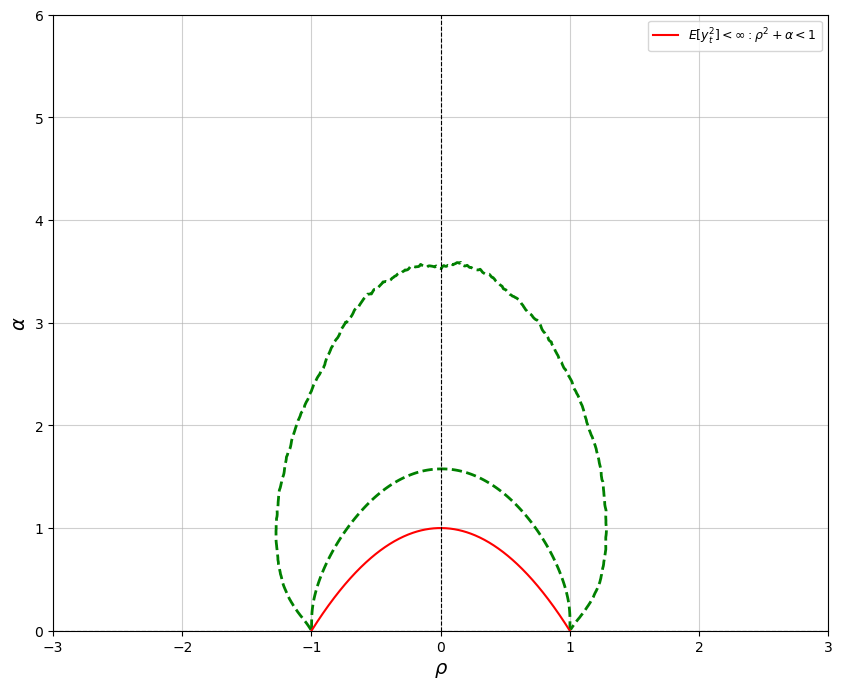

In [6]:
v = 100000 # 
T = 20000

#z_samples = np.random.normal(0, 1, T)  # Draw T samples from N(0, 1)
z_samples = t.rvs(df=v, size = T) / np.sqrt(v / (v - 2))  # Standardized Student-t random variables

# Define ranges for rho and alpha
rho_vals = np.linspace(-2.5, 2.5, 500)
alpha_vals = np.linspace(0.01, 10, 500)  # Avoid alpha = 0 for stability

# Grid to evaluate the condition
Rho, Alpha = np.meshgrid(rho_vals, alpha_vals)

# Compute the average log for the condition
log_condition1 = np.zeros_like(Rho)
log_condition2 = np.zeros_like(Rho)

for i in range(Rho.shape[0]):  # For each alpha
    for j in range(Rho.shape[1]):  # For each rho
        rho = Rho[i, j]
        alpha = Alpha[i, j]
        
        log_terms1 = np.abs(rho + np.sqrt(alpha) * z_samples)
        log_condition1[i, j] = np.mean(log_terms1)

        log_terms2 = np.log(np.abs(rho + z_samples * np.sqrt(alpha)))
        log_condition2[i, j] = np.mean(log_terms2)



# Determine the boundary where the condition transitions from < 0 to >= 0
contour_levels1 = [1]
contour_levels2 = [0]


plt.figure(figsize=(10, 8))

# Contour: 1/T ∑ log(|ρ + z_t √α|) = 0
contour = plt.contour(Rho, Alpha, log_condition1, levels=contour_levels1, colors='green', linewidths=2, linestyles='--')
plt.plot([], [], color='green', linestyle='--', label=r'')

contour = plt.contour(Rho, Alpha, log_condition2, levels=contour_levels2, colors='green', linewidths=2, linestyles='--')
plt.plot([], [], color='green', linestyle='--', label=r'')



# Curve: ρ^2 + α = 1
rho_curve = np.linspace(-1, 1, 500)
alpha_curve = 1 - rho_curve**2
plt.plot(rho_curve, alpha_curve, label=r'$E[y_t^2] < \infty : \rho^2 + \alpha < 1$', color='red')



# Labels and legend
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Alpha axis
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Rho axis
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel(r'$\alpha$', fontsize=14)

plt.legend(fontsize=9, loc='upper right')
plt.grid(alpha=0.6)
plt.ylim(0, 6)
plt.xlim(-3, 3)

# Show the plot
plt.show()

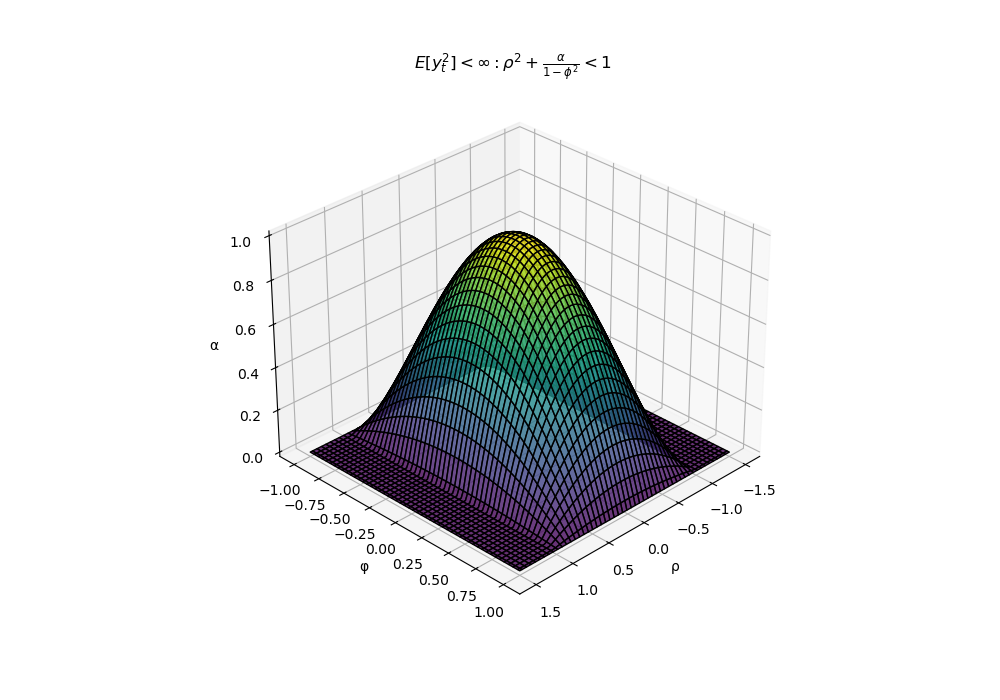

In [10]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range for the variables
rho = np.linspace(-1.5, 1.5, 100)  # ρ values between -2 and 2
phi = np.linspace(-1, 1, 100)  # φ values between -2 and 2
rho, phi = np.meshgrid(rho, phi)

# Compute α based on the constraint ρ^2 + α / (1 - φ^2) = 1
# Ensure α is weakly positive
with np.errstate(divide='ignore', invalid='ignore'):  # Handle divisions safely
    alpha = np.maximum(0, (1 - rho**2) * (1 - phi**2))

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(rho, phi, alpha, cmap='viridis', edgecolor='k', alpha=0.8)

# Label axes
ax.set_xlabel('ρ')
ax.set_ylabel('φ') # φ
ax.set_zlabel('α') # α

# Add a title
ax.set_title('$E[y_t^2] < \infty : \\rho^2 + \\frac{\\alpha}{1 - \\phi^2} < 1$')

# Rotate the plot
ax.view_init(elev=30, azim=45)  # Set the view angle

# Show plot
plt.show()
